# Uma breve introdução ao SageMath | parte VI_1
***
Rogério T. Cavalcanti

In [203]:
reset()
%display latex

## Pré-SageManifold

A classe manifold vem com algumas variedades pré-definidos. São Elas:

* Sphere
* Torus
* Minkowski
* Kerr

Inicialmente usaremos o Toro.

### 1. Toro

Varemos como obter:  

   * A parametrização $T(\theta,\phi)=\left((R+r\cos \theta)\cos \phi,(R+r\cos \theta)\sin \phi, r\sin \theta\right)$;

   *  A métrica $g_{ij}$;

   *  A área do Toro;

   * Os símbolos de Christoffel $\Gamma^i_{\;jk}$;

   * As componentes do tensor de Riemann e escalar de Ricci;

   * As geodésicas.

In [204]:
T.<theta, phi> = manifolds.Torus(2.5, 1)
print(T)

2-dimensional Riemannian submanifold T embedded in the Euclidean space E^3


A parametrização no espaço euclidiano já vem pré-definida

In [205]:
T.embedding().display()

T --> E^3
   (theta, phi) |--> (X, Y, Z) = ((cos(theta) + 2.50000000000000)*cos(phi), (cos(theta) + 2.50000000000000)*sin(phi), sin(theta))

In [208]:
toro=T.plot({},srange(0,2*pi+.2,.1),srange(0,2*pi+.2,.1),color='gray',mesh=True,alpha=.5,frame=False)
toro

Graphics3d Object

#### 1.1 Métrica

A métrica também já vem pré-definida.

In [209]:
T.metric().display()

gamma = dtheta*dtheta + (cos(theta)^2 + 5*cos(theta) + 25/4) dphi*dphi

O que permite calcular diretamente a área.

In [216]:
T.metric().det().expr().factor().sqrt().simplify().integrate(theta,0,2*pi).integrate(phi,0,2*pi)

10*pi^2

Os símbolos de Christofell.

In [217]:
T.metric().christoffel_symbols_display()

Gam^theta_phi,phi = 1/2*(2*cos(theta) + 5)*sin(theta) 
Gam^phi_theta,phi = -2*sin(theta)/(2*cos(theta) + 5)

E a curvatura.

In [218]:
T.metric().riemann().display_comp()

Riem(gamma)^theta_phi,theta,phi = cos(theta)^2 + 5/2*cos(theta) 
Riem(gamma)^theta_phi,phi,theta = -cos(theta)^2 - 5/2*cos(theta) 
Riem(gamma)^phi_theta,theta,phi = 2*(2*sin(theta)^2 - 5*cos(theta) - 2)/(4*cos(theta)^2 + 20*cos(theta) + 25) 
Riem(gamma)^phi_theta,phi,theta = 2*cos(theta)/(2*cos(theta) + 5)

In [219]:
T.metric().ricci_scalar().display()

r(gamma): T --> R
   (theta, phi) |--> 4*cos(theta)/(2*cos(theta) + 5)

#### 1.1 Espaço tangente

Fixamos um ponto a partir do qual definiremos o espaço tangente

In [220]:
p=T.point((pi/3,pi/3), name='p')
print(p)
p

Point p on the 2-dimensional Riemannian submanifold T embedded in the Euclidean space E^3


Point p on the 2-dimensional Riemannian submanifold T embedded in the Euclidean space E^3

In [221]:
Tp=T.tangent_space(p)
print(Tp)

Tangent space at Point p on the 2-dimensional Riemannian submanifold T embedded in the Euclidean space E^3


In [222]:
Tp.bases()

[Basis (d/dtheta,d/dphi) on the Tangent space at Point p on the 2-dimensional Riemannian submanifold T embedded in the Euclidean space E^3]

In [223]:
v=Tp((1,2),name='v')
print(v)

Tangent vector v at Point p on the 2-dimensional Riemannian submanifold T embedded in the Euclidean space E^3


In [224]:
v.display()

v = d/dtheta + 2 d/dphi

$g\left|_{p}(v,v)\right. = g_{\mu\nu}v^\mu v^\nu$

In [226]:
T.metric().at(p)(v,v)

37

#### 1.3 Geodésicas

Vamos agora usar a integração numérica de geodésicas implementada no Sage.

Primeiro iniciamos a geodésica

In [227]:
var('tau')
geo=T.integrated_geodesic(T.metric(), (tau,0,20),v,name='geo')

In [228]:
geo.system(verbose=True)

Geodesic geo in the 2-dimensional Riemannian submanifold T embedded in the Euclidean space E^3 equipped with Riemannian metric gamma on the 2-dimensional Riemannian submanifold T embedded in the Euclidean space E^3, and integrated over the Real interval (0, 20) as a solution to the following geodesic equations, written with respect to Chart (T, (theta, phi)):

Initial point: Point p on the 2-dimensional Riemannian submanifold T embedded in the Euclidean space E^3 with coordinates [1/3*pi, 1/3*pi] with respect to Chart (T, (theta, phi))
Initial tangent vector: Tangent vector v at Point p on the 2-dimensional Riemannian submanifold T embedded in the Euclidean space E^3 with components [1, 2] with respect to Chart (T, (theta, phi))

d(theta)/dtau = Dtheta
d(phi)/dtau = Dphi
d(Dtheta)/dtau = -1/2*(2*Dphi^2*cos(theta) + 5*Dphi^2)*sin(theta)
d(Dphi)/dtau = 4*Dphi*Dtheta*sin(theta)/(2*cos(theta) + 5)



[[-1/2*(2*Dphi^2*cos(theta) + 5*Dphi^2)*sin(theta),
  4*Dphi*Dtheta*sin(theta)/(2*cos(theta) + 5)],
 Tangent vector v at Point p on the 2-dimensional Riemannian submanifold T embedded in the Euclidean space E^3,
 Chart (T, (theta, phi))]

Resolve

In [229]:
sol = geo.solve()

Interpola

In [230]:
interp = geo.interpolate()

E podemos então plotar

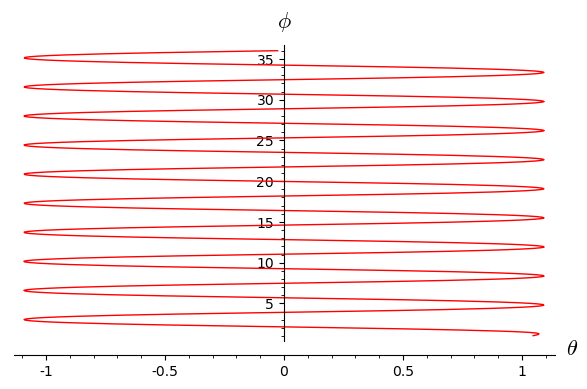

In [231]:
geo.plot_integrated(plot_points=500)

Uma possibilidade mais interessante é plotar em $\mathbb{E}^3$ usando a parametrização.

In [232]:
T.embedding().display()

T --> E^3
   (theta, phi) |--> (X, Y, Z) = ((cos(theta) + 2.50000000000000)*cos(phi), (cos(theta) + 2.50000000000000)*sin(phi), sin(theta))

In [233]:
pgeo=geo.plot_integrated(mapping=T.embedding(),thickness=2,plot_points=500)
pgeo

Graphics3d Object

Adicionamos vetores tangentes com a opção `display_tangent=True`

In [234]:
pgeot=geo.plot_integrated(mapping=T.embedding(),thickness=2,plot_points=500,display_tangent=True,plot_points_tangent=50,scale=.12)
pgeot

Graphics3d Object

In [236]:
toro+pgeot

Graphics3d Object

### 2. dS $\to$ Minkowski

Vejamos mais uma a fatia (1+1)-dimensional do espaço-tempo de de Sitter imerso no espaço-tempo de Minkoswki.

Veremos: 

   * A imersão de $\mathcal{dS}_2$ em $\mathbb{M}$;
   * A métrica $g_{ij}$ obtida fazendo o pullback de $\eta_{ij}$
   * A curva $\beta(t)=[u(t),v(t)]=\left(t,\text{sech} t\right)$;
   * O comprimento da curva no intervalo $0\,<\,t\,<\,\infty$;
   * Os símbolos de Christoffel $\Gamma^i_{\;jk}$;
   * O tensor de Riemann;
   * As geodésicas. 

#### 2.1 Inicialização do espaço-tempo 

In [237]:
dS = Manifold(2, 'dS_2', latex_name=r'\mathcal{dS}_2',structure='Lorentzian')

In [238]:
print(dS)

2-dimensional Lorentzian manifold dS_2


In [239]:
char_H.<u,v> = dS.chart()

In [240]:
char_H.frame()

Coordinate frame (dS_2, (d/du,d/dv))

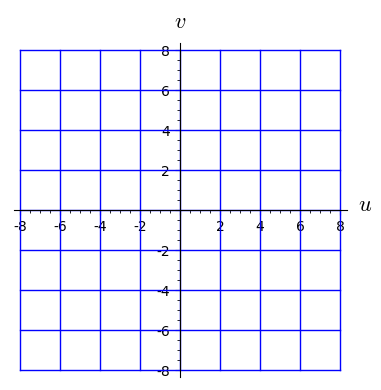

In [241]:
char_H.plot(color='blue')

#### 2.2 Curva

Definimos a curva $\beta$ em dS com domínio em toda a reta real.

In [242]:
R.<t> = RealLine()
beta = dS.curve({char_H: [t, sech(t)]}, (t, -oo, oo), latex_name=r'\beta')

In [243]:
beta.display()

R --> dS_2
   t |--> (u, v) = (t, sech(t))

Vetor tangente $\beta'$

In [244]:
vbeta = beta.tangent_vector_field()
vbeta.display()

d/du - sinh(t)/cosh(t)^2 d/dv

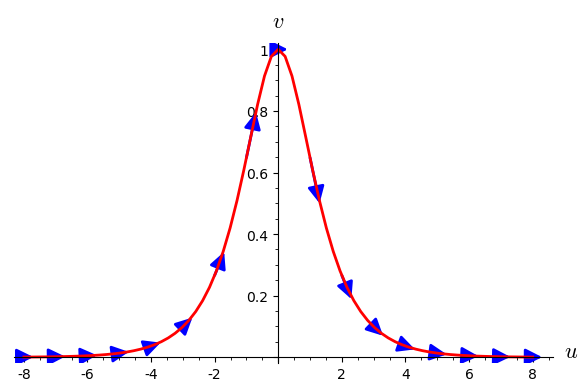

In [245]:
show(beta.plot(thickness=2) +vbeta.plot(chart=char_H,number_values=17, scale=0.3))

#### 2.3 Imersão em $\mathbb{M}$

Iniciaremos o espaço de Minkowski, já pré-definido, para fazer a imersão de $\mathcal{dS}_2$

In [246]:
M.<t, x, y, z> = manifolds.Minkowski()

A imersão é implementada pela aplicação diferenciável $H$

In [247]:
H = dS.diff_map(M, (sinh(u),cosh(u)*cos(v), cosh(u)*sin(v), 0),name='H')
print(H)

Differentiable map H from the 2-dimensional Lorentzian manifold dS_2 to the 4-dimensional Lorentzian manifold M


Que neste caso é igual à parametrização que vimos antes.

In [248]:
H.display()

H: dS_2 --> M
   (u, v) |--> (t, x, y, z) = (sinh(u), cos(v)*cosh(u), cosh(u)*sin(v), 0)

Com isso podemos obter um ponto em $\mathbb{M}$ a partir de um ponto em $\mathcal{dS}_2$.

In [250]:
p2=dS.point((1,3),name='p2');print(p2)

Point p2 on the 2-dimensional Lorentzian manifold dS_2


In [251]:
q=H(p2)

In [252]:
print(q)

Point H(p2) on the 4-dimensional Lorentzian manifold M


In [ ]:
q.coord()

Mais uma vez podemos usar a aplicação $H$ para vizualizar a superfície $\mathcal{dS}_2$ em $\mathbb{M}$.

In [253]:
pchar_H = char_H.plot(M.default_chart(),mapping=H,ambient_coords=(t,x,y),number_values=50,max_range=pi, color=(0,.5,1),frame =False)
pchar_H

Graphics3d Object

Bem como a curva $\beta$

In [254]:
pbeta = beta.plot(M.default_chart(),thickness=3, number_values=15,max_range=3,mapping=H,ambient_coords=(t,x,y))
pbeta

Graphics3d Object

In [255]:
pvbeta=vbeta.plot(M.default_chart(),thickness=3,mapping=H,max_range=2.3,width=3, number_values=15,ambient_coords=(t,x,y))
pvbeta

Graphics3d Object

In [258]:
show(pvbeta+pchar_H+pbeta)

Graphics3d Object

#### 2.4 Métrica

In [259]:
gH=dS.metric(name='gH', latex_name=r'g_{\mathcal{dS}}')

In [261]:
M.metric()[:]

[-1  0  0  0]
[ 0  1  0  0]
[ 0  0  1  0]
[ 0  0  0  1]

Podemos usar a aplicação H para estabelecer a métrica em $\mathcal{dS}_2$ fazendo o pull back da métrica de Minkowski.  

In [262]:
g_pull_H = H.pullback(M.metric())

In [263]:
g_pull_H.display()

H^*(g) = -du*du + cosh(u)^2 dv*dv

In [264]:
gH.set(g_pull_H)

In [265]:
gH.display()

gH = -du*du + cosh(u)^2 dv*dv

Como isso podemos verificar que $\beta'$ é do topo tempo $\forall t \in \mathbb{R}$

In [266]:
gH.along(beta)(vbeta,vbeta)

Scalar field on the Real number line R

In [267]:
gH.along(beta)(vbeta,vbeta).display()

R --> R
t |--> -1/cosh(t)^2

Comprimento da curva $\beta$ no intervalo (0,$\infty$)
$$L_\beta = \int_0^\infty \sqrt{-g(\beta',\beta')}dt$$

In [268]:
sqrt(-gH.along(beta)(vbeta,vbeta).expr()).integrate(t,0,oo)

1/2*pi

Fixamos o espaço tangente no ponto p2 e um vetor tangente para calcular as geodésicas.

In [269]:
TpS=dS.tangent_space(p2)

In [270]:
v2=TpS((6.1,4))

In [271]:
v2.display()

6.10000000000000 d/du + 4 d/dv

In [ ]:
gH.at(p2)(v2,v2)

#### 2.5 Geodésica

In [272]:
var('t')
geo2=dS.integrated_geodesic(gH, (t,0,10),v2,name='geo2')

In [273]:
sol2 = geo2.solve()

In [274]:
interp2 = geo2.interpolate()

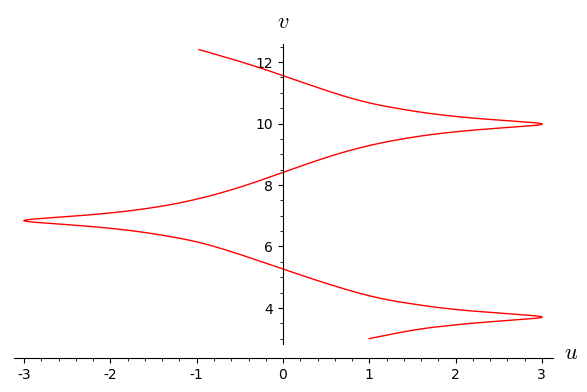

In [275]:
geo2.plot_integrated(plot_points=500)

In [276]:
pgeo2=geo2.plot_integrated(mapping=H,thickness=2,plot_points=500,ambient_coords=(t,x,y),display_tangent=True,plot_points_tangent=20,scale=.2,width_tangent=3)
pgeo2

Graphics3d Object

In [277]:
pgeo2+pchar_H

Graphics3d Object

#### 2.6 Curvatura

Podemos novamente calcular O símbolo de Christoffel

In [278]:
gH.christoffel_symbols_display()

Gam^u_vv = cosh(u)*sinh(u) 
Gam^v_uv = sinh(u)/cosh(u)

O tensor de Riemann e o escalar de Ricci

In [279]:
gH.riemann().display_comp()

Riem(gH)^u_vuv = cosh(u)^2 
Riem(gH)^u_vvu = -cosh(u)^2 
Riem(gH)^v_uuv = 1 
Riem(gH)^v_uvu = -1

In [280]:
gH.ricci_scalar().display()

r(gH): dS_2 --> R
   (u, v) |--> 2

***

### 3. Demonstração de $K_g = \frac{1}{2}R$ para variedades 2-dimensionais

Usaremos o que vimos até aqui para provar de forma simples e direta que $K_g = \frac{1}{2}R$ para variedades 2-dimensionais. Onde $K_g$ é a curvatura gaussiana e $R$ é o escalar de Ricci.

Inicializamos a variedade

In [281]:
F = Manifold(2, 'F', latex_name=r'\mathcal{F}')
print(F)

2-dimensional differentiable manifold F


In [282]:
Z.<u,v> = F.chart()

In [283]:
h = F.metric('h')
print(h)

Riemannian metric h on the 2-dimensional differentiable manifold F


E uma métrica arbitrária.

In [284]:
var('h1,h2,h3')
h1 = function('h1')(u,v)
h2 = function('h2')(u,v)
h3 = function('h3')(u,v)

In [285]:
h[0,0] = h1
h[0,1] = h3
h[1,1] = h2

In [287]:
h[:]

[h1(u, v) h3(u, v)]
[h3(u, v) h2(u, v)]

In [288]:
h.christoffel_symbols_display()

Gam^u_uu = 1/2*(h2(u, v)*d(h1)/du + h3(u, v)*d(h1)/dv - 2*h3(u, v)*d(h3)/du)/(h1(u, v)*h2(u, v) - h3(u, v)^2) 
Gam^u_uv = 1/2*(h2(u, v)*d(h1)/dv - h3(u, v)*d(h2)/du)/(h1(u, v)*h2(u, v) - h3(u, v)^2) 
Gam^u_vv = -1/2*(h2(u, v)*d(h2)/du + h3(u, v)*d(h2)/dv - 2*h2(u, v)*d(h3)/dv)/(h1(u, v)*h2(u, v) - h3(u, v)^2) 
Gam^v_uu = -1/2*(h3(u, v)*d(h1)/du + h1(u, v)*d(h1)/dv - 2*h1(u, v)*d(h3)/du)/(h1(u, v)*h2(u, v) - h3(u, v)^2) 
Gam^v_uv = -1/2*(h3(u, v)*d(h1)/dv - h1(u, v)*d(h2)/du)/(h1(u, v)*h2(u, v) - h3(u, v)^2) 
Gam^v_vv = 1/2*(h3(u, v)*d(h2)/du + h1(u, v)*d(h2)/dv - 2*h3(u, v)*d(h3)/dv)/(h1(u, v)*h2(u, v) - h3(u, v)^2)

In [289]:
R = h.ricci_scalar()
R.display()

r(h): F --> R
   (u, v) |--> 1/2*(h2(u, v)*(d(h1)/dv)^2 + h1(u, v)*(d(h2)/du)^2 - 2*(h1(u, v)*h2(u, v) - h3(u, v)^2)*d^2(h1)/dv^2 + (h2(u, v)*d(h1)/du - h3(u, v)*d(h1)/dv)*d(h2)/du - 2*(h1(u, v)*h2(u, v) - h3(u, v)^2)*d^2(h2)/du^2 + (h3(u, v)*d(h1)/du + h1(u, v)*d(h1)/dv)*d(h2)/dv - 2*(h3(u, v)*d(h2)/du + h1(u, v)*d(h2)/dv)*d(h3)/du + 4*(h1(u, v)*h2(u, v) - h3(u, v)^2)*d^2(h3)/dudv - 2*(h2(u, v)*d(h1)/du + h3(u, v)*d(h1)/dv - 2*h3(u, v)*d(h3)/du)*d(h3)/dv)/(h1(u, v)^2*h2(u, v)^2 - 2*h1(u, v)*h2(u, v)*h3(u, v)^2 + h3(u, v)^4)

E a curvatura Gaussiana dada por $$K_g=\frac{R_{0101}}{\det(g)}$$

In [290]:
K_g = h.riemann().down(h)[0,1,0,1]/h.det().expr()

In [291]:
K_g == R/2

True

## FIM